# Validation of the PyPSA-Africa Electric Demand

This notebooks investigates the data quality of the African electric consumption
data by comparing PyPSA, official Nigerian and Our World in Data (incl. BP & Ember).

To reproduce the findings obtained in this notebook,
please run the full snakemake workflow for the Africa.
To do so, please set ``countries = ["Africa"]`` in the ``config.yaml`` file.

Note. An unoptimized prepared network is sufficient for this notebook. 

## Preparation

### Import packages

In [1]:
# import packages

import logging
import os

import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

### Set main directory to root folder

In [2]:
# set current folders
import sys

sys.path.append("../../")  # adds path to $ .../pypsa-africa
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-africa")  # moves path to root

This is the repository path:  c:\Users\Max\Desktop\pypsa-africa
Had to go 2 folder(s) up.


## 1. Load data 

#### Our World in Data
Retrieved from their GitHub: https://github.com/owid/energy-data/tree/master \
Web interface: https://ourworldindata.org/energy 

Our data sources:
- Energy consumption (primary energy, energy mix and energy intensity): this data is sourced from a combination of three sources—the BP Statistical Review of World Energy, the EIA and the SHIFT Data Portal.
- Electricity generation (electricity generation, and electricity mix): this data is sourced from a combination of three sources—the BP Statistical Review of World Energy, the Ember – Data Explorer and the Ember European Electricity Review.
- Other variables: this data is collected from a variety of sources (United Nations, World Bank, Gapminder, Maddison Project Database, etc.). More information is available in our codebook.


In [3]:
from scripts._helpers import three_2_two_digits_country  # _helpers are from pypsa

url = "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv"
df = pd.read_csv(url)
df = df.loc[:, ["iso_code", "country", "year", "electricity_demand"]]
df = df[df["iso_code"].notna()]  # removes antartica
df["iso_code_2"] = df.loc[:, "iso_code"].apply(lambda x: three_2_two_digits_country(x))
electricity_demand_owid = df
electricity_demand_owid.tail(2)

,iso_code,country,year,electricity_demand,iso_code_2
22341,ZWE,Zimbabwe,2020,12.22,ZW
22342,ZWE,Zimbabwe,2021,NaN,ZW


#### PyPSA network

Requires a solved or unsolved network.

In [4]:
solved_network_path = os.getcwd() + "/networks/elec_s_55_ec.nc"
pypsa_network = pypsa.Network(solved_network_path)
electricity_demand_pypsa = pypsa_network.loads_t.p_set
electricity_demand_pypsa.head(2)

INFO:pypsa.io:Imported network elec_s_55_ec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


Load,AO69 0,AO70 0,AO71 0,AO72 0,AO73 0,AO74 0,AO75 0,AO76 0,AO77 0,AO78 0,BI350 0,BJ0 0,BJ39 0,BJ40 0,BW2 0,CD167 0,CD2 0,CD321 0,CD322 0,CD323 0,CD324 0,CD325 0,CD326 0,CD327 0,CD328 0,CD329 0,CD330 0,CD331 0,CD332 0,CD333 0,CD334 0,CD335 0,CD68 0,CF26 0,CG108 0,CG109 0,CI28 0,CI29 0,CI30 0,CI31 0,CI32 0,CI33 0,CI34 0,CI343 0,CI35 0,CI36 0,CI37 0,CI38 0,CM189 0,CM190 0,CM191 0,CM192 0,CM193 0,CM194 0,DZ111 0,DZ112 0,DZ113 0,DZ114 0,DZ115 0,DZ116 0,DZ117 0,DZ118 0,DZ119 0,DZ120 0,DZ121 0,DZ122 0,DZ123 0,DZ124 0,DZ125 0,DZ126 0,DZ127 0,DZ128 0,DZ129 0,DZ130 0,DZ131 0,DZ132 0,DZ133 0,DZ134 0,DZ135 0,DZ136 0,DZ137 0,DZ138 0,DZ139 0,DZ140 0,DZ141 0,DZ62 0,EG145 0,EG146 0,EG147 0,EG148 0,EG149 0,EG150 0,EG151 0,EG62 0,EG62 1,EG62 2,EH62 0,ER110 0,ET41 0,ET42 0,ET43 0,ET44 0,ET45 0,ET46 0,ET47 0,ET48 0,ET49 0,ET50 0,ET51 0,ET52 0,ET53 0,ET54 0,ET55 0,GA56 0,GA57 0,GA58 0,GA59 0,GA60 0,GA61 0,GH0 0,GH1 0,GM143 0,GN97 0,GQ23 0,GQ24 0,GQ25 0,GW355 0,KE13 0,KE14 0,KE15 0,KE16 0,KE17 0,KE18 0,KE20 0,KE21 0,KE22 0,LR195 0,LS319 0,LS320 0,LY336 0,LY337 0,LY338 0,LY339 0,LY340 0,LY341 0,LY342 0,LY345 0,LY346 0,LY347 0,LY62 0,MA351 0,MA62 0,MA79 0,MA80 0,MA82 0,MA83 0,MA84 0,MA85 0,MA86 0,MA87 0,MA88 0,MA89 0,MA90 0,MA91 0,MA92 0,MA93 0,MA94 0,MA95 0,MG104 0,MG105 0,MG106 0,MG107 0,ML28 0,MR102 0,MR81 0,MW169 0,MW170 0,MW171 0,MZ10 0,MZ12 0,MZ2 0,MZ348 0,MZ7 0,MZ8 0,NA172 0,NA173 0,NA2 0,NE0 0,NE142 0,NE352 0,NG0 0,NG174 0,NG175 0,NG176 0,NG177 0,NG178 0,NG179 0,NG180 0,NG181 0,NG182 0,NG183 0,NG184 0,NG185 0,NG186 0,NG187 0,NG188 0,RW100 0,RW101 0,RW349 0,RW98 0,RW99 0,SD41 0,SD96 0,SL27 0,SN144 0,SN28 0,SO354 0,SS41 0,SZ103 0,SZ2 0,TD4 0,TD5 0,TG0 0,TN62 0,TN63 0,TN64 0,TN65 0,TN66 0,TN67 0,TZ152 0,TZ153 0,TZ154 0,TZ155 0,TZ156 0,TZ157 0,TZ158 0,TZ159 0,TZ160 0,TZ161 0,TZ162 0,TZ163 0,TZ164 0,UG13 0,ZA11 0,ZA196 0,ZA197 0,ZA198 0,ZA199 0,ZA2 0,ZA2 1,ZA2 2,ZA2 3,ZA2 4,ZA2 5,ZA200 0,ZA201 0,ZA202 0,ZA203 0,ZA204 0,ZA204 1,ZA204 2,ZA205 0,ZA206 0,ZA207 0,ZA208 0,ZA209 0,ZA210 0,ZA211 0,ZA212 0,ZA213 0,ZA214 0,ZA215 0,ZA216 0,ZA217 0,ZA218 0,ZA219 0,ZA220 0,ZA221 0,ZA222 0,ZA223 0,ZA224 0,ZA225 0,ZA226 0,ZA227 0,ZA228 0,ZA229 0,ZA230 0,ZA231 0,ZA232 0,ZA233 0,ZA234 0,ZA235 0,ZA236 0,ZA237 0,ZA238 0,ZA239 0,ZA240 0,ZA241 0,ZA242 0,ZA243 0,ZA244 0,ZA245 0,ZA246 0,ZA247 0,ZA248 0,ZA249 0,ZA250 0,ZA251 0,ZA252 0,ZA253 0,ZA254 0,ZA255 0,ZA256 0,ZA257 0,ZA258 0,ZA259 0,ZA260 0,ZA261 0,ZA262 0,ZA263 0,ZA264 0,ZA265 0,ZA266 0,ZA267 0,ZA268 0,ZA269 0,ZA270 0,ZA271 0,ZA272 0,ZA273 0,ZA274 0,ZA275 0,ZA276 0,ZA277 0,ZA278 0,ZA279 0,ZA280 0,ZA281 0,ZA282 0,ZA283 0,ZA284 0,ZA285 0,ZA286 0,ZA287 0,ZA288 0,ZA289 0,ZA290 0,ZA291 0,ZA292 0,ZA293 0,ZA294 0,ZA295 0,ZA296 0,ZA297 0,ZA298 0,ZA299 0,ZA300 0,ZA301 0,ZA302 0,ZA303 0,ZA304 0,ZA305 0,ZA306 0,ZA307 0,ZA308 0,ZA309 0,ZA310 0,ZA311 0,ZA312 0,ZA313 0,ZA314 0,ZA315 0,ZA316 0,ZA317 0,ZA318 0,ZA344 0,ZA353 0,ZA9 0,ZM165 0,ZM166 0,ZM168 0,ZM2 0,ZW2 0
snapshot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1453.882822,28.621636,33.642836,0.400988,89.656469,106.267459,50.925510,38.634576,27.533206,126.647322,39.672606,102.942574,13.087395,22.105704,693.602177,30.763874,115.971049,81.970035,15.295273,205.518421,1.888361,0.546189,37.596747,13.952029,12.014960,45.335506,12.731152,0.491896,4.078344,1.031663,76.606134,150.055939,46.458710,1048.027501,373.659446,40.623852,2612.355998,25.951879,19.208788,46.940195,2.239505,25.628882,39.258566,63.017055,27.564676,4.069942,15.647315,3.669332,308.408629,56.767913,384.142121,15.424801,65.750985,456.073955,2.186159,86.616029,21.425548,7.658374,33.285338,24.014611,0.813600,14.518126,27.931537,51.049952,60.412935,6.818066,12.4

# 2. Validate

#### Steps:
- Align country coverage of dataframe
- Pick year of interest for 'Our World in Data'
- Align dataframe naming and temporal resolution
- Merge dataframe


Reduce "Our World in Data" to contain the same countries as PyPSA

In [5]:
country_in_network = (
    electricity_demand_pypsa.columns.to_frame()["Load"].apply(lambda x: x[0:2]).values
)
electricity_demand_owid_mini = electricity_demand_owid[
    electricity_demand_owid["iso_code_2"].isin(country_in_network)
]

Create total electric demand in TWh from OWID for year of interest

In [6]:
year_owid = 2020  # option
df = electricity_demand_owid_mini
df = df[df["year"] == year_owid]
electricity_demand_owid_mini = df
electricity_demand_owid_mini.head(2)

,iso_code,country,year,electricity_demand,iso_code_2
658,DZA,Algeria,2020,72.66,DZ
821,AGO,Angola,2020,14.39,AO


Create total electric demand in TWh from PyPSA for chosen demand year in `config.yaml`

In [7]:
# short the columns to only two digit (for groupby in next step)
electricity_demand_pypsa.columns = (
    electricity_demand_pypsa.columns.to_frame()["Load"].apply(lambda x: x[0:2]).values
)

Align PyPSA dataframe to 'Our World in Data'

In [8]:
from scripts._helpers import two_2_three_digits_country  # _helpers are from pypsa
import yaml

with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

df = electricity_demand_pypsa
df = pd.DataFrame(
    (df.sum().T.groupby([df.columns]).sum() / 10**6).round(2)
)  # MWh to TWh
df = df.reset_index()
df = df.rename(columns={0: "electricity_demand", "index": "iso_code_2"})
df["year"] = config["load_options"]["prediction_year"]
df["iso_code"] = df.loc[:, "iso_code_2"].apply(lambda x: two_2_three_digits_country(x))

map_dic = pd.Series(
    electricity_demand_owid_mini.country.values,
    index=electricity_demand_owid_mini.iso_code_2,
).to_dict()
df["country"] = df["iso_code_2"].map(map_dic)
electricity_demand_pypsa = df
electricity_demand_pypsa.head(2)

,iso_code_2,electricity_demand,year,iso_code,country
0,AO,24.17,2030,AGO,Angola
1,BI,0.46,2030,BDI,Burundi


Merge dataframes

In [9]:
h = config["load_options"]["prediction_year"]
electricity_demand_pypsa["source"] = f"PyPSA {h}"
electricity_demand_owid_mini["source"] = f"Our World in Data {year_owid}"
df_merge = pd.concat([electricity_demand_pypsa, electricity_demand_owid_mini])

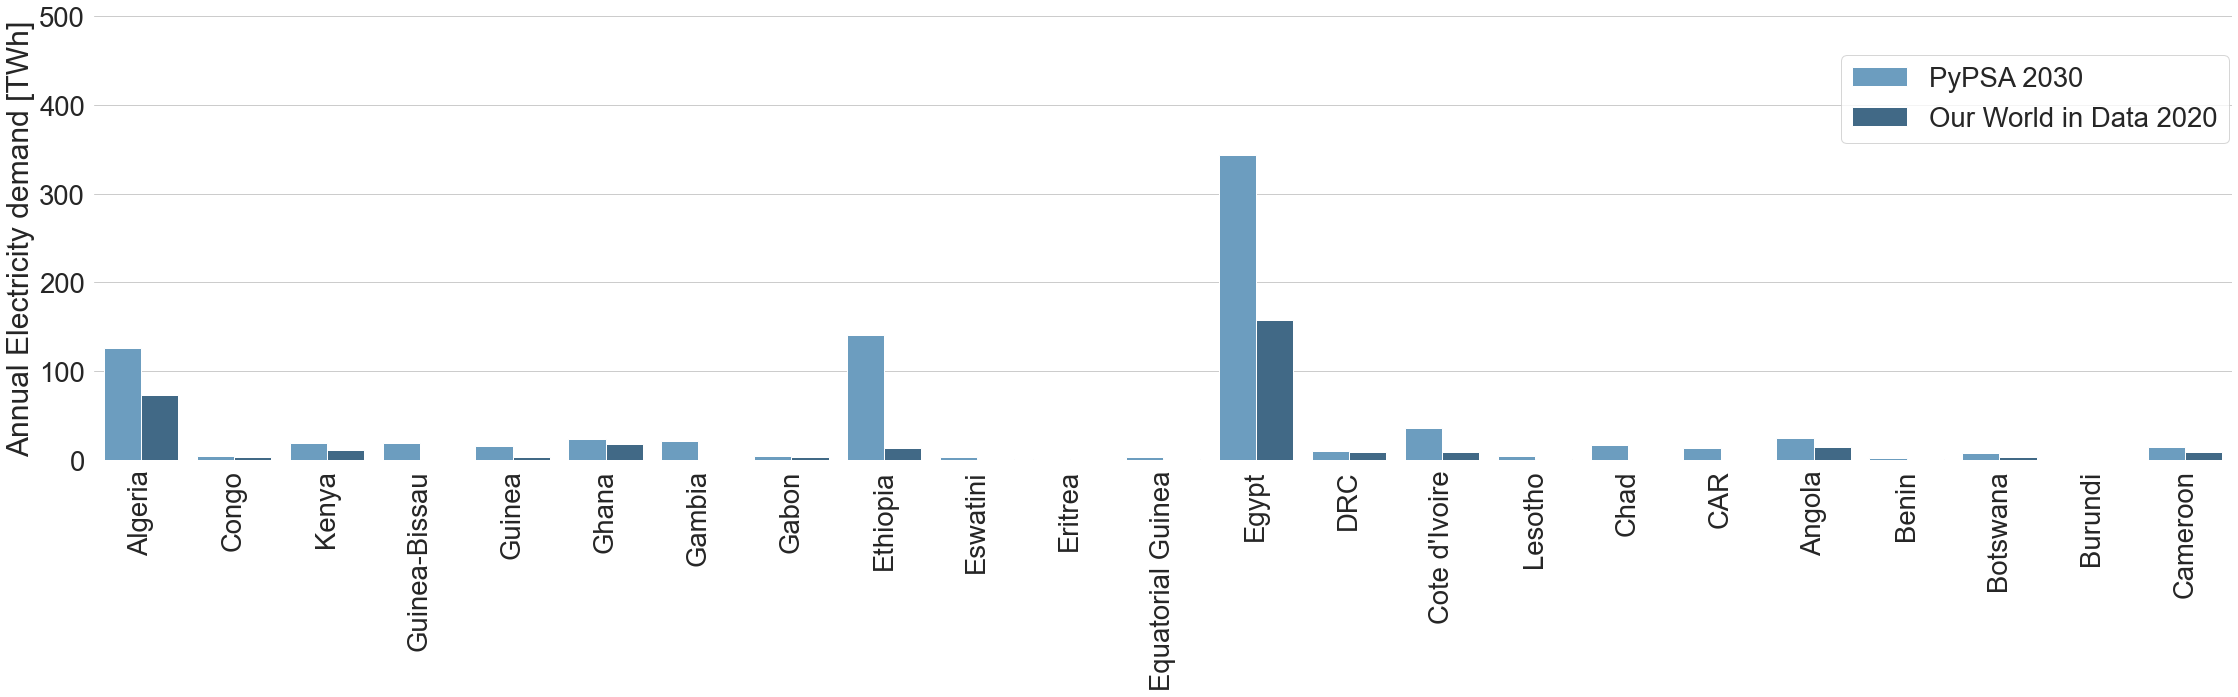

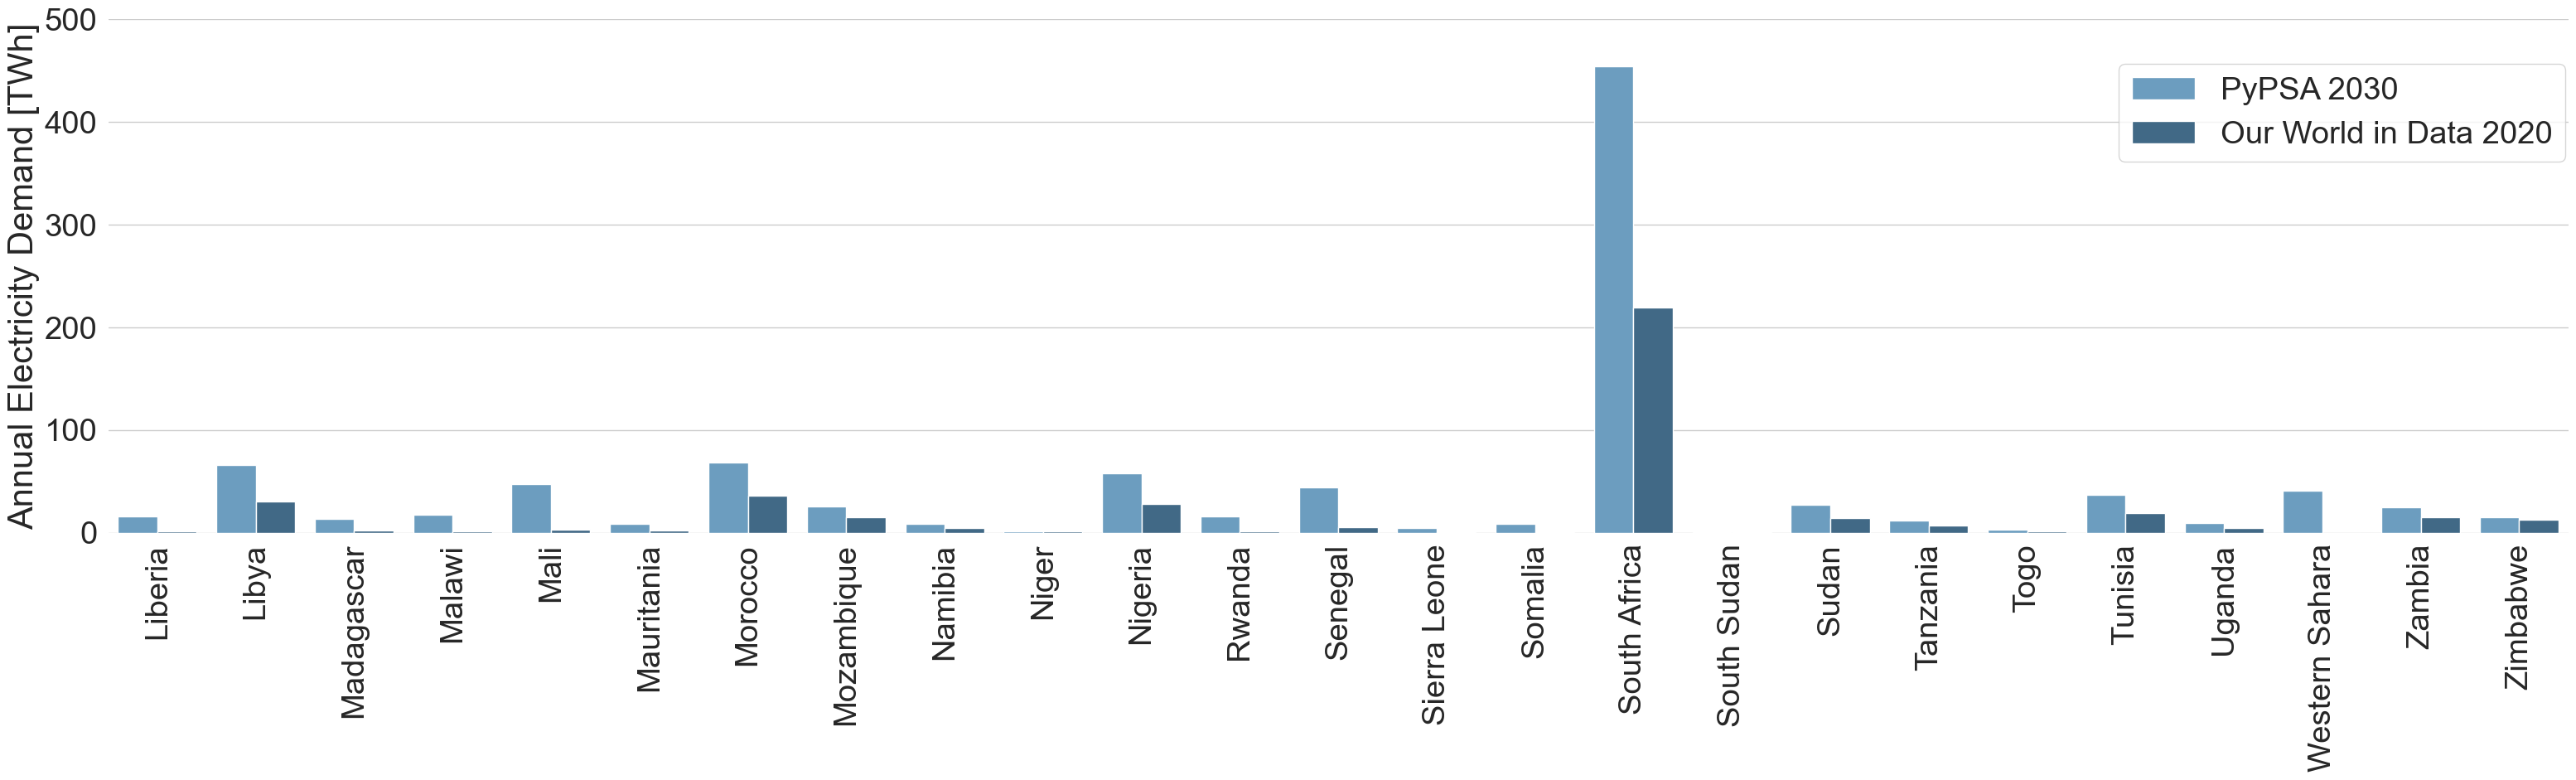

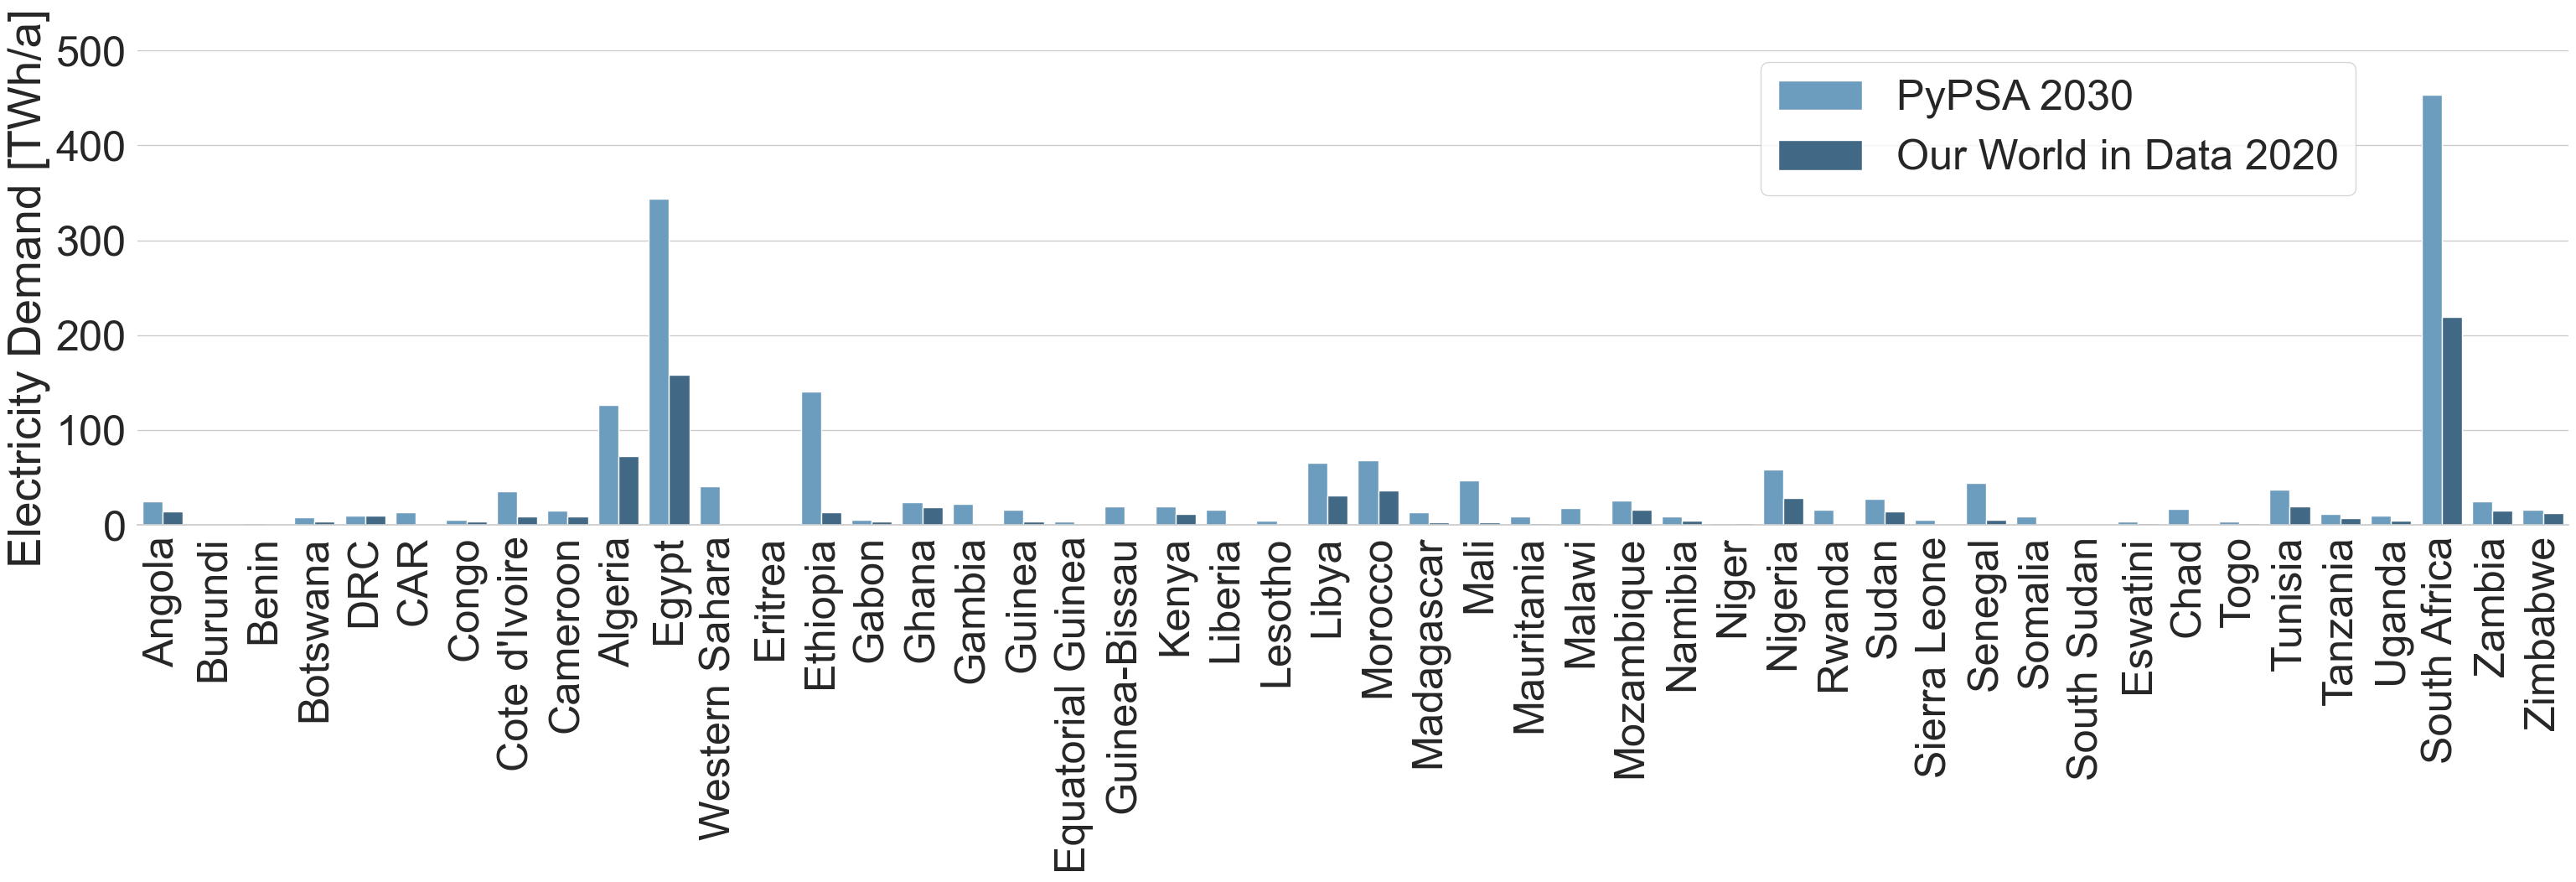

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=2.5)

# shorten names
df_merge.loc[df_merge["country"] == "Democratic Republic of Congo", "country"] = "DRC"
df_merge.loc[df_merge["country"] == "Central African Republic", "country"] = "CAR"

# split dataframe. No equal split possible since 'Our World in Data' misses "EH" == Western Sahara
df_merge1 = (
    df_merge.sort_values("country").iloc[0:46].sort_values("source", ascending=False)
)
df_merge2 = (
    df_merge.sort_values("country")
    .iloc[46:]
    .sort_values("source", ascending=False)
    .sort_values("country")
)

# Initialize the matplotlib figure
ax = sns.catplot(
    x="country",
    y="electricity_demand",
    hue="source",
    data=df_merge1,
    palette="Blues_d",
    kind="bar",
    height=8,
    aspect=4,
)
ax.set_xticklabels(rotation=90)
sns.move_legend(ax, "upper right", bbox_to_anchor=(0.85, 0.9), frameon=True, title=None)
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="Annual Electricity demand [TWh]", ylim=(0, 500))
ax.savefig("demand-validation-part1.pdf", bbox_inches="tight")

ax = sns.catplot(
    x="country",
    y="electricity_demand",
    hue="source",
    data=df_merge2,
    palette="Blues_d",
    kind="bar",
    height=8,
    aspect=4,
)
ax.set_xticklabels(rotation=90)
sns.move_legend(ax, "upper right", bbox_to_anchor=(0.85, 0.9), frameon=True, title=None)
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="Annual Electricity Demand [TWh]", ylim=(0, 500))
ax.savefig("demand-validation-part2.pdf", bbox_inches="tight")


sns.set_theme(style="whitegrid", font_scale=3.3)
ax = sns.catplot(
    x="country",
    y="electricity_demand",
    hue="source",
    data=df_merge,
    palette="Blues_d",
    kind="bar",
    height=8,
    aspect=4,
)

ax.set_xticklabels(rotation=90)
sns.move_legend(
    ax, "upper right", bbox_to_anchor=(0.75, 0.94), frameon=True, title=None
)
sns.despine(left=True, bottom=False)
ax.set(xlabel=None, ylabel="Electricity Demand [TWh/a]", ylim=(0, 500))
# ax.savefig("demand-validation-part.pdf", bbox_inches='tight')

,source,electricity_demand
0,Our World in Data 2020,759.07
1,PyPSA 2030,1881.37
0,IRENA 2030,1924.00
1,Alova et al. 2030,1877.00


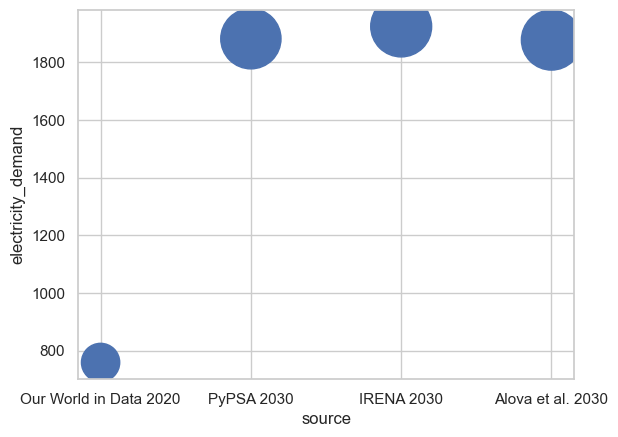

In [11]:
sns.set_theme(style="whitegrid", font_scale=1)

african_total_consumption = (
    df_merge.groupby(by="source").sum().drop(columns="year").reset_index()
)
extra = pd.DataFrame(
    data={
        "source": ["IRENA 2030", "Alova et al. 2030"],
        "electricity_demand": [1004 + 920, 1877],
    }
)
# https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2015/IRENA_Africa_2030_REmap_2015_low-res.pdf
# https://www.nature.com/articles/s41560-020-00755-9

african_total_consumption = pd.concat([african_total_consumption, extra])
african_total_consumption.plot.scatter(
    x="source", y="electricity_demand", s="electricity_demand"
)
african_total_consumption